## Clustering

In [5]:
# loading requires libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Feature data X

For information on how the data was gathered, please refer to the data tab on this website. There, you can find information on data gathering, cleaning, etc. For clusterization methods, our feature data would be the same as the data used for all other models, but I have to remove the *PastGroup* variable, since those are the clusters we are trying to predict.

Although clustering analysis is often used as a data exploration method, separating the vectors into their correct *PastGroup* label would offer an appropriate predictive model for me. This is because the goal is for my model to predict who makes it out of the group phase, which would be the same as classifying them under one of the two possible groups: 0 (didn't make it) and 1 (got out of the group stage).

In [6]:
# import data
df = pd.read_csv('../data/cleanData/allTables.csv')
df.drop(['Unnamed: 0','Country','Group','Year'], axis=1, inplace=True)
df.head()

,Host,PastGroup,DifficultGroup,RankFIFA,QualiStreak,Caps,eliteClub,Age
0,0,1,1,20,2,24.000000,7,26.212717
1,0,0,1,1,2,38.304348,15,27.370376
2,0,1,1,42,1,17.826087,0,24.355427
3,0,0,1,24,1,22.869565,5,25.345519
4,0,1,0,8,7,18.043478,8,25.915279


### Model descriptions

**K-Means**

K-Means is a model that separates *n* vectors into *k* clusters by assigning them to the cluster whose prototype (cluster centroid) is most similar to the vector in question. In simpler terms, K-Means attempts to group different rows of data based on their similarity. Hopefully, if the grouping is done correctly, we can learn new patterns and information about our data and how they relate to each other. 

For this method, we often use the Euclidean distance between points to understand their similarity. The closer the points are to each other, the more similar they are, and vice versa. To optimize this model, we use the elbow method, which is a graph that uses the inertia and/or distortion metrics to evaluate the model's ability to cluster data into different groups.

Even though K-Means is a fast and efficient clustering method, it tends to work best with very specific datasets. It doesn't do well with data that isn't obviously forming a cluster or data that has unusual shapes (e.g. rings, circles, etc.).

**DBSCAN**

DBSCAN stands for Density Based Clustering of Applications with Noise. This type of model focuses on the density of data around an area and allows for points that are relatively nearby to be classified as different clusters if there happens to be non-dense space between them. For points that have no density around them, they are seen as outliers. This type of model is non-parametric, meaning that all adjustments to its performance come from the user in the form of hyperparameters.

DBSCANs are best used for non-linear data, as it is able to better capture complicated relationships between data points. In situations where K-Means struggles to properly identify clusters, it would be a good idea to bring in DBSCANs to see if they perform better.

In order to find the optimal hyperparameters, just like with K-Means, we can use the Elbow Method or the Silhouette Method. The Elbow Method focuses on the sum of squared distances of samples to their closest cluster center (good would be low inertia and low number of clusters), while the Silhouette Method focuses on the distance between the clusters (the closer the score is to 1, the better the clustering).

**Hierarchical Clustering**

Hierarchical clustering is not just one type of model, but a type of clustering. This method of clustering doesn't assume a particular number of groups, rather it creates a tree (dendrogram) of clusters and continues to separate points until each point is seen as its own cluster. Within hierarchical clustering, there are two types of methods: agglomerative and division. Agglomerative starts by making each point a cluster and works its way up to one cluster. Division does the opposite.

These types of models are comparable to DBSCANs in terms of performance. They are able to cluster non-linear data with good precision. However, each model's accuracy can be dependent on the situation. It is best used for EDA and occasionaly as label predictors (depending on your data). To optimize it, we can also use the Elbow and Silhouette Methods.

### Data preprocessing

For this model, I had to remove certain non-numerical labels, given that numerical data is needed for clustering. I could've turned the string/factor variables into numerical data but they wouldn't provide much information on the teams' performance. The removed variables are *Country*, *Year*, and *Group*. Since none of these are seen as likely predictors of a team's success, I chose to remove them for this modeling section.

The data used will be the same as the data previously shown on this page, but I will be removing the *PastGroup* variable to use later on for evaluation purposes. Also, there is no point in leaving the respective clusters for each data point within their vector! Furthermore, I standardized the data to ensure proper representation in the vector and improve results. Following is the normalized data set.

In [7]:
# separate the data into features and label and normalize
y = df[['PastGroup']]
x = df.drop('PastGroup', axis=1)

# standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)
X = pd.DataFrame(X, columns=x.columns, index=x.index)
X.head()

,Host,DifficultGroup,RankFIFA,QualiStreak,Caps,eliteClub,Age
0,-0.197386,1.732051,-0.206644,-0.460516,-1.005656,0.464009,-0.617086
1,-0.197386,1.732051,-1.239863,-0.460516,0.643064,2.060600,0.403308
2,-0.197386,1.732051,0.989715,-0.687232,-1.717262,-0.933008,-2.254155
3,-0.197386,1.732051,0.010876,-0.687232,-1.135950,0.064862,-1.381459
4,-0.197386,-0.577350,-0.859203,0.673062,-1.692206,0.663583,-0.879257


### Model creation

**K-Means**

First we must go through hyperparameter tuning. In order to do so, we use the Elbow Method, which means iterating over different, possible hyperparameters to see which one gives us the best score.

In [8]:
# import required libraries
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# created a list for each desired metric to later display on a dataframe and plot
clus = []
dist = []
ine = []
for i in range(1,11):
    model = KMeans(n_clusters=i, random_state=0).fit(X)
    ine.append(model.inertia_)
    dist.append(sum(np.min(cdist(X, model.cluster_centers_,'euclidean'), axis=1)) / X.shape[0]) # used this part of code from a Geeks for Geeks page
    clus.append(i)

# use the list to create a dataframe with the performance
df2 = pd.DataFrame({'Clusters': clus, 'Distortion': dist, 'Inertia': ine})
df2

,Clusters,Distortion,Inertia
0,1,2.410444,1120.000000
1,2,2.098632,866.046925
2,3,1.972900,713.955895
3,4,1.799369,593.695264
4,5,1.648833,516.249552
5,6,1.551209,465.984073
6,7,1.481509,421.136172
7,8,1.428495,390.201734
8,9,1.362819,360.102228
9,10,1.337178,336.328137


Elbow plot:

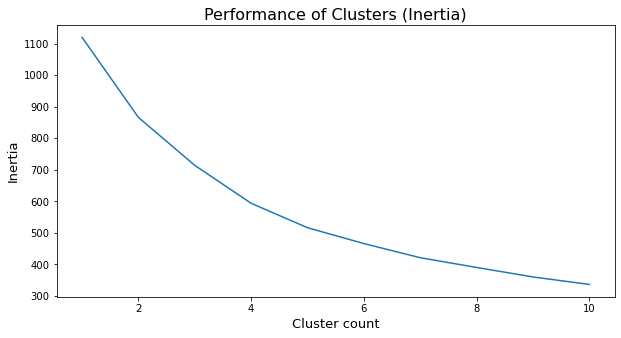

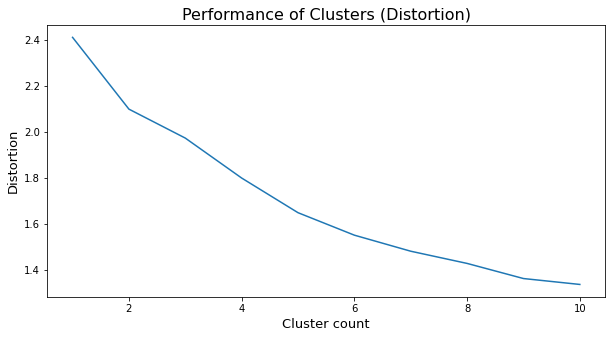

In [11]:
# elbow plot for inertia
plt.figure(figsize=(10,5))
sns.lineplot(data=df2, x='Clusters', y='Inertia')
plt.title('Performance of Clusters (Inertia)', fontsize=16)
plt.xlabel('Cluster count', fontsize=13)
plt.ylabel('Inertia', fontsize=13)
plt.show()

# elbow plot for distortion
plt.figure(figsize=(10,5))
sns.lineplot(data=df2, x='Clusters', y='Distortion')
plt.title('Performance of Clusters (Distortion)', fontsize=16)
plt.xlabel('Cluster count', fontsize=13)
plt.ylabel('Distortion', fontsize=13)
plt.show()

According to the above graphs, the optimal choice of clusters would be at the inflection point of 5 clusters. Now that we know this, we must recreate the model with the optimal number of clusters.

In [12]:
# fit the model using the optimal number of clusters
model = KMeans(n_clusters=5, random_state=0).fit(X)
# print the inertia for the model and variables used
print('Inertia for the 5-cluster model is : ' + str(model.inertia_))
print('The variables used for the model were : ' + str(model.feature_names_in_))

Inertia for the 5-cluster model is : 516.2495520286845
The variables used for the model were : ['Host' 'DifficultGroup' 'RankFIFA' 'QualiStreak' 'Caps' 'eliteClub' 'Age']


Ideally, we would've wanted the clustering method to group the data into two groups, one representing the teams that got into the knockout stage and the other representing the teams that didn't make it out of the group stage. Unfortunately, the optimal number of clusters is 5, so we now have to figure out what each of them represent.

**DBSCAN**

We repeat the hyperparameter tuning process used for K-Means, but this time with the silhouette score.

In [13]:
# import desired metrics
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# create list for iterating values and dataframe
clus = []
eps = []
sil = []
for i in [1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2]:
    model = DBSCAN(eps=i, min_samples=3)
    preds = model.fit_predict(X)
    eps.append(i)
    sil.append(silhouette_score(X, preds))
    clus.append(len(pd.Series(preds).unique()))

# create a data frame with the metrics
df3 = pd.DataFrame({'Clusters': clus, 'Eps': eps, 'Silhouette': sil})
df3

,Clusters,Eps,Silhouette
0,7,1.0,-0.047503
1,6,1.1,0.084714
2,7,1.2,0.111169
3,7,1.3,0.133401
4,4,1.4,0.213129
5,4,1.5,0.222293
6,3,1.6,0.221920
7,4,1.7,0.217839
8,4,1.8,0.223472
9,4,1.9,0.227048


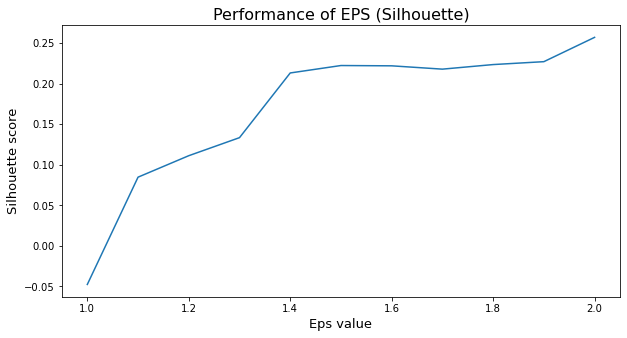

In [14]:
# plot the elbow method graph
plt.figure(figsize=(10,5))
sns.lineplot(data=df3, x='Eps',y='Silhouette')
plt.title('Performance of EPS (Silhouette)', fontsize=16)
plt.xlabel('Eps value', fontsize=13)
plt.ylabel('Silhouette score', fontsize=13)
plt.show()

The optimal results say that we should choose a DBSCAN model with eps of 2. For context, the eps hyperparameter defines the threshold for distance between points to be considered part of the same cluster. That is, for each point that is being compared to another, if they are less than 2 distance units away from each other, they will be considered as belonging to the same group. For the silhouette score, we want to get as close to 1 as possible, and an eps of 2.0 gave us the highest silhouette score of 0.24. This score and eps correspond to a model that created 3 clusters.

In [15]:
# creating the optimal model
model2 = DBSCAN(eps=2, min_samples=3)
preds = model2.fit_predict(X)
# printing their labels and variables used
print('The labels assigned by this model are : ' + str(set(model2.labels_)))
print('The variables used for the model were : ' + str(model2.feature_names_in_))

The labels assigned by this model are : {0, 1, -1}
The variables used for the model were : ['Host' 'DifficultGroup' 'RankFIFA' 'QualiStreak' 'Caps' 'eliteClub' 'Age']


DBSCAN's optimal model clusters the data into 3 groups, and most of the points are being put into two of the three groups. This result is closer to what we're looking for, but we need to see if the clusters correspond to the teams that make it out group stages and those who don't.

**Agglomerative**

We repeat the hyperparameter tuning process used for DBSCAN modeling.

In [16]:
from sklearn.cluster import AgglomerativeClustering
# Perform Agglomerative Clustering
clus = []
sil = []
for i in range(2,11):
    model = AgglomerativeClustering(n_clusters=i)
    preds = model.fit_predict(X)
    sil.append(silhouette_score(X, preds))
    clus.append(i)

# turn the metrics into a dataframe    
df4 = pd.DataFrame({'Clusters': clus, 'Silhouette': sil})
df4

,Clusters,Silhouette
0,2,0.236370
1,3,0.268206
2,4,0.277240
3,5,0.228017
4,6,0.243023
5,7,0.236350
6,8,0.238881
7,9,0.243201
8,10,0.236582


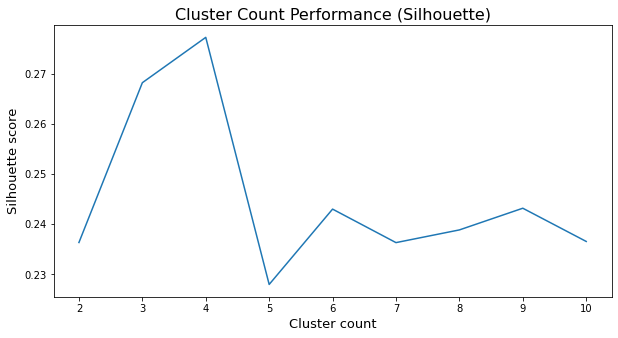

In [18]:
# plot the iterative process
plt.figure(figsize=(10,5))
sns.lineplot(data=df4, x='Clusters',y='Silhouette')
plt.title('Cluster Count Performance (Silhouette)', fontsize=16)
plt.xlabel('Cluster count', fontsize=13)
plt.ylabel('Silhouette score', fontsize=13)
plt.show()

The optimal results say that we should choose a model with 4 clusters, as the silhouette score is highest with that option. Choosing 3 clusters would yield a similar score, so if we are interested in minimizing the number of clusters, 3 would also be a good option. Since I want to get 2 or 3 clusters, I'll go for the smaller option.

In [19]:
# creating the optimal model and finding some of its attributes
model3 = AgglomerativeClustering(n_clusters=3)
preds = model3.fit_predict(X)
# print the labels and variable used in the model
print('The labels assigned by this model are : ' + str(set(model3.labels_)))
print('The variables used for the model were : ' + str(model3.feature_names_in_))

The labels assigned by this model are : {0, 1, 2}
The variables used for the model were : ['Host' 'DifficultGroup' 'RankFIFA' 'QualiStreak' 'Caps' 'eliteClub' 'Age']


The above code shows some of the attributes coming from the optimal model.

### Results
Given that K-Mean works best for linear data, I found DBSCAN and agglomerative clustering to be the ones that gave the best result, or at least, the results closest to what I was looking for. K-Means wanted to create too many clusters and the other two options decided on a range of 2-4 clusters as the optimal amount. In terms of ease of use, they were all equally easy to create. Since I'm using the sklearn library, all I had to do was replicate the code I had used for the previous model. It only took some messing around with the hyperparameters to create the model. 

To find connections between the predicted labels and the gorund truth, I added the predictions back into the y dataframe that contained the labels and compared the values for each model's predictions against the labels.

In [13]:
pd.options.mode.chained_assignment = None
# adding the labels as columns to the y df
y['K-Means'] = model.labels_
y['DBSCAN'] = model2.labels_
y['Agglomerative'] = model3.labels_
y['K-Means.D'] = np.where(y['PastGroup']==y['K-Means'], True, False)
y['DBSCAN.D'] = np.where(y['PastGroup']==y['DBSCAN'], True, False)
y['Agglomerative.D'] = np.where(y['PastGroup']==y['Agglomerative'], True, False)
y

,PastGroup,K-Means,DBSCAN,Agglomerative,K-Means.D,DBSCAN.D,Agglomerative.D
0,1,0,0,0,False,False,False
1,0,0,0,0,True,True,True
2,1,6,0,1,False,False,True
3,0,0,0,0,True,True,True
4,1,4,1,0,False,True,False
...,...,...,...,...,...,...,...
155,0,1,1,1,False,False,False
156,1,1,1,1,True,True,True
157,1,1,1,1,True,True,True
158,0,3,1,1,False,False,False


In [14]:
# sum over values to see what got guessed correctly
y.sum(axis=0)

PastGroup           80
K-Means            409
DBSCAN             106
Agglomerative      106
K-Means.D           32
DBSCAN.D            71
Agglomerative.D     51
dtype: int64

I decided to sum the rows to test the accuracy of the clustering methods. Since the length of *PastGroup* is 160, the closer the sum gets to this number (only works with the columns that end in '.D'), the closer we are to good accuracy. We can take the sum of each column and divide by 160 to get the accuracy. Based on this scoring method, the model that performs best is the DBSCAN model, but it still comes in at less than 50%. This is mainly due to the clustering methods creating more than two clusters. So, by default, we will immediately get incorrect clusterization for anything that isn't a 0 or a 1. This could be fixable by choosing hyperparameters that yield 2 clusters, but then we wouldn't be selecting the optimal models according to their processes.

In [22]:
# adding the predicted labels to the original df
df['K-Means'] = model.labels_
df['DBSCAN'] = model2.labels_
df['Agglomerative'] = model3.labels_
df['K-Means.D'] = np.where(df['PastGroup']==df['K-Means'], True, False)
df['DBSCAN.D'] = np.where(df['PastGroup']==df['DBSCAN'], True, False)
df['Agglomerative.D'] = np.where(df['PastGroup']==df['Agglomerative'], True, False)

To see if the clustering can give any new information on the data, I plotted a two-dimensional version of the data and colored the points based on their predicte cluster. It can be diffuclt to visualize the reasoning behind the clustering since we're not including all dimensions used to cluster.

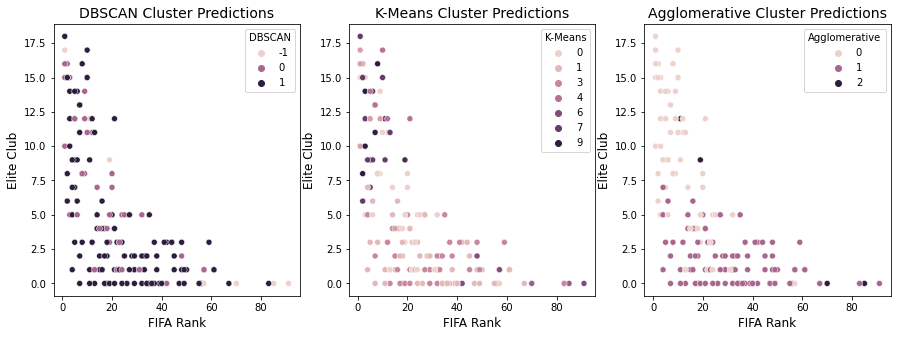

In [38]:
# creating a scatterplot with their predicted labels
fig, ax = plt.subplots(1,3, figsize=(15,5))
sns.scatterplot(data=df, x='RankFIFA', y='eliteClub', hue='DBSCAN', ax=ax[0])
sns.scatterplot(data=df, x='RankFIFA', y='eliteClub', hue='K-Means', ax=ax[1])
sns.scatterplot(data=df, x='RankFIFA', y='eliteClub', hue='Agglomerative', ax=ax[2])
ax[0].set_title('DBSCAN Cluster Predictions', fontsize=14)
ax[0].set_xlabel('FIFA Rank', fontsize=12)
ax[0].set_ylabel('Elite Club', fontsize=12)
ax[1].set_title('K-Means Cluster Predictions', fontsize=14)
ax[1].set_xlabel('FIFA Rank', fontsize=12)
ax[1].set_ylabel('Elite Club', fontsize=12)
ax[2].set_title('Agglomerative Cluster Predictions', fontsize=14)
ax[2].set_xlabel('FIFA Rank', fontsize=12)
ax[2].set_ylabel('Elite Club', fontsize=12);

Unfortunately, the clustering did not provide any new insights on the data. The agglomerative clustering method gets a bit closer to properly separating the clusters than the two other emthods, but it's still not good enough. From this limited perspective, I theorize that the variables I have for predicting who makes it out of the group stage might not be as effective as initially thought. Either that, or some of the variables aren't needed and are just creating additional noise.

### Conclusion
I would like to start my conclusion by reminding the reader that clusterization methods are usually employed for exploratory data analysis. These methods are not meant to be used as predictive models, but, with the right data, they can work well in doing so. After using K-Means, DBSCAN, and Agglomerative clustering methods, optimal models separated the data into 3 or 4 clusters. Although the models are likely finding trends in the data we haven't been able to decipher, they aren't keen in clustering the data into only 2 categories.

If desired, we could ask the models to purposely put the data into only two clusters, and then we could compare their label predictions against the teams who made it past the group stage and those who didn't. This would be a next step for this section, but for now I want to accept the recommended optimal models as the ones to analyze.

If we're trying to predict teams' success in the World Cup with an accuracy of over 70%, these models are not the way to go. The DBSCAN, which has the best score at ~45% accuracy rate, is performing at a worse rate than a random guess. Do keep in mind that the clusters have more than 2 categories, so it makes perfect sense for them to be inefficient in classifying a 2-category problem. Going forward, it could be valuable to explore the relationships that the model found and also their ability to predict the teams that make it out of the group stage. Maybe the model's ability to predict 1s is much better than the overall accuracy!